In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
with open('/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/drive/My Drive/foo.txt'

Hello Google Drive!

In [ ]:
import os
import random
import pathlib
import shutil
import matplotlib.pyplot as plt

In [ ]:
# Distinct image classes
img_classes = ['cat', 'dog']

# Folders for training, testing, and validation subsets
dir_data  = pathlib.Path.cwd().joinpath('data')
dir_train = dir_data.joinpath('train')
dir_valid = dir_data.joinpath('validation')
dir_test  = dir_data.joinpath('test')

# Train/Test/Validation split config
pct_train = 0.8
pct_valid = 0.1
pct_test = 0.1

In [ ]:
def setup_folder_structure() -> None:
    # Create base folders if they don't exist
    if not dir_data.exists():  dir_data.mkdir()
    if not dir_train.exists(): dir_train.mkdir()
    if not dir_valid.exists(): dir_valid.mkdir()
    if not dir_test.exists():  dir_test.mkdir()
    
    # Create subfolders for each class
    for cls in img_classes:
        if not dir_train.joinpath(cls).exists(): dir_train.joinpath(cls).mkdir()
        if not dir_valid.joinpath(cls).exists(): dir_valid.joinpath(cls).mkdir()
        if not dir_test.joinpath(cls).exists():  dir_test.joinpath(cls).mkdir()
        
    # Print the directory structure
    dir_str = os.system('''ls -R data | grep ":$" | sed -e 's/:$//' -e 's/[^-][^\/]*\//--/g' -e 's/^/   /' -e 's/-/|/' ''')
    print(dir_str)
    return

  
setup_folder_structure()

0


In [ ]:
def train_test_validation_split(src_folder: pathlib.PosixPath, class_name: str) -> dict:
    # For tracking
    n_train, n_valid, n_test = 0, 0, 0
    
    # Random seed for reproducibility
    random.seed(42)
    
    # Iterate over every image
    for file in src_folder.iterdir():
        img_name = str(file).split('/')[-1]
        
        # Make sure it's JPG
        if file.suffix == '.jpg':
            # Generate a random number
            x = random.random()
            
            # Where should the image go?
            tgt_dir = ''
            
            # .80 or below
            if x <= pct_train:  
                tgt_dir = 'train'
                n_train += 1
                
            # Between .80 and .90
            elif pct_train < x <= (pct_train + pct_valid):  
                tgt_dir = 'validation'
                n_valid += 1
                
            # Above .90
            else:  
                tgt_dir = 'test'
                n_test += 1
                
            # Copy the image
            shutil.copy(
                src=file,
                # data/<train|valid|test>/<cat\dog>/<something>.jpg
                dst=f'{str(dir_data)}/{tgt_dir}/{class_name}/{img_name}'
            )
            
    return {
        'source': str(src_folder),
        'target': str(dir_data),
        'n_train': n_train,
        'n_validaiton': n_valid,
        'n_test': n_test
    }

In [ ]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('PetImages/Cat'),
    class_name='cat'
)

CPU times: user 13.9 s, sys: 8.62 s, total: 22.5 s
Wall time: 21min 34s


{'n_test': 1245,
 'n_train': 10015,
 'n_validaiton': 1239,
 'source': '/drive/My Drive/PetImages/Cat',
 'target': '/drive/My Drive/data'}

In [ ]:
%%time

train_test_validation_split(
    src_folder=pathlib.Path.cwd().joinpath('PetImages/Dog'),
    class_name='dog'
)

CPU times: user 21.3 s, sys: 9.91 s, total: 31.2 s
Wall time: 48min 21s


{'n_test': 1246,
 'n_train': 10023,
 'n_validaiton': 1240,
 'source': '/drive/My Drive/PetImages/Dog',
 'target': '/drive/My Drive/data'}

In [ ]:
def plot_random_sample(img_dir: pathlib.PosixPath):
    # How many images we're showing
    n = 10
    # Get absolute paths to these N images
    imgs = random.sample(list(img_dir.iterdir()), n)
    
    # Make sure num_row * num_col = n
    num_row = 2
    num_col = 5 

    # Create a figure
    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = plt.imread(str(imgs[i]))
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        # Set title as <train|test|validation>/<cat\dog>/<img_name>.jpg
        ax.set_title('/'.join(str(imgs[i]).split('/')[-3:]))

    plt.tight_layout()
    plt.show()

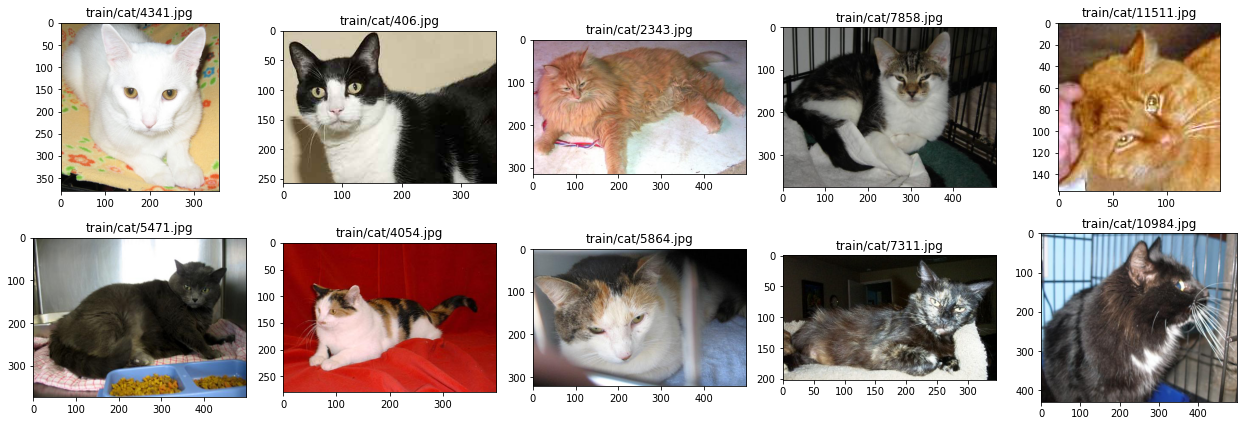

In [ ]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data/train/cat'))

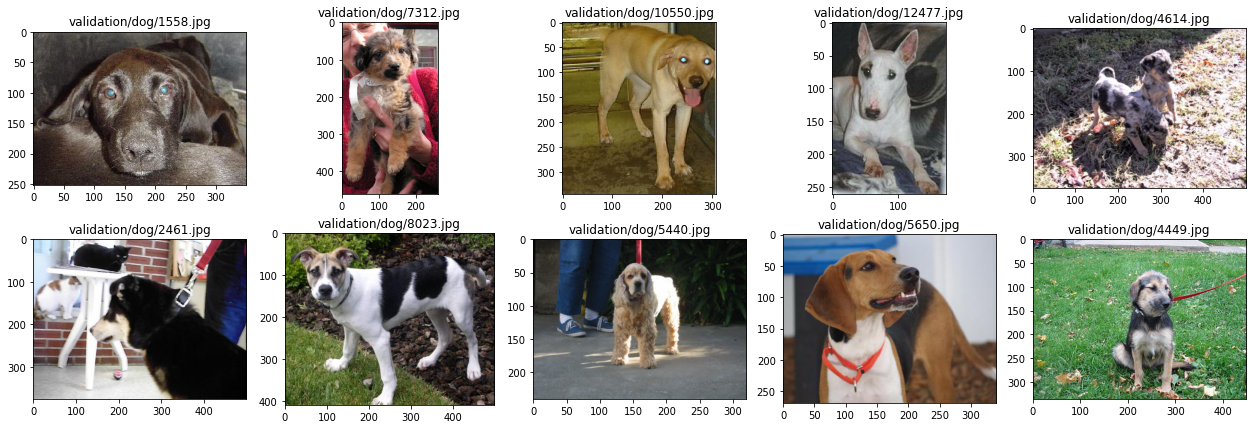

In [ ]:
plot_random_sample(img_dir=pathlib.Path().cwd().joinpath('data/validation/dog'))

In [ ]:
import os
import pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)

from PIL import Image, ImageOps
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

(346, 461, 3)


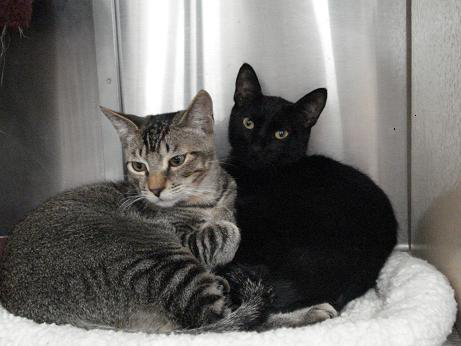

In [ ]:
img1 = Image.open('data/train/cat/8.jpg')
print(np.array(img1).shape)
display(img1)

(375, 500, 3)


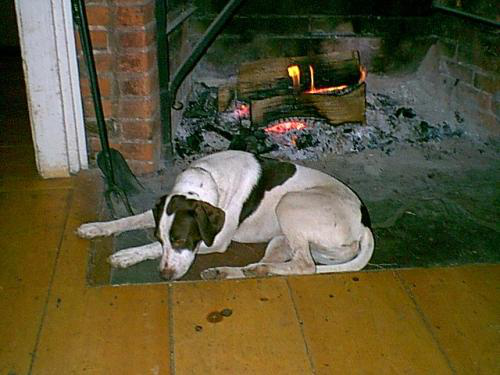

In [ ]:
img2 = Image.open('data/train/dog/25.jpg')
print(np.array(img2).shape)
display(img2)

In [ ]:
np.array(img1)

array([[[ 42,  26,  29],
        [ 41,  25,  28],
        [ 37,  21,  24],
        ...,
        [168, 169, 164],
        [168, 169, 164],
        [168, 169, 164]],

       [[ 32,  16,  19],
        [ 33,  17,  20],
        [ 35,  19,  22],
        ...,
        [178, 179, 174],
        [175, 176, 171],
        [172, 173, 168]],

       [[ 36,  20,  23],
        [ 38,  22,  25],
        [ 41,  25,  28],
        ...,
        [181, 182, 177],
        [177, 178, 173],
        [169, 170, 165]],

       ...,

       [[231, 231, 229],
        [233, 233, 231],
        [236, 236, 234],
        ...,
        [ 87,  83,  80],
        [ 84,  80,  77],
        [ 84,  83,  79]],

       [[229, 229, 227],
        [234, 234, 232],
        [237, 237, 235],
        ...,
        [ 92,  88,  85],
        [ 92,  88,  85],
        [ 91,  90,  86]],

       [[229, 229, 227],
        [234, 234, 232],
        [237, 237, 235],
        ...,
        [ 94,  90,  87],
        [ 94,  90,  87],
        [ 93,  92,  88]]

In [ ]:
np.array(img2)

array([[[  7,  24,   5],
        [  7,  24,   5],
        [  4,  21,   2],
        ...,
        [  3,  25,   2],
        [  3,  25,   2],
        [  3,  25,   2]],

       [[  0,  13,   0],
        [  0,  15,   0],
        [  0,  17,   0],
        ...,
        [  4,  22,   0],
        [  3,  21,   0],
        [  2,  20,   0]],

       [[  5,  20,   1],
        [  5,  20,   1],
        [  7,  22,   3],
        ...,
        [ 11,  24,   4],
        [ 10,  23,   3],
        [ 10,  23,   3]],

       ...,

       [[ 99,  85,  22],
        [102,  84,  20],
        [106,  85,  18],
        ...,
        [ 95,  83,   7],
        [ 93,  81,   5],
        [ 91,  79,   3]],

       [[106,  92,  27],
        [104,  89,  22],
        [105,  86,  17],
        ...,
        [ 97,  85,   9],
        [ 94,  82,   6],
        [ 92,  80,   4]],

       [[104,  94,  25],
        [102,  87,  18],
        [102,  85,  15],
        ...,
        [ 97,  85,   9],
        [ 94,  82,   6],
        [ 91,  79,   3]]

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20038 images belonging to 2 classes.


In [ ]:
first_batch = train_data.next()

In [ ]:
first_batch[0].shape, first_batch[1].shape

((64, 224, 224, 3), (64, 2))

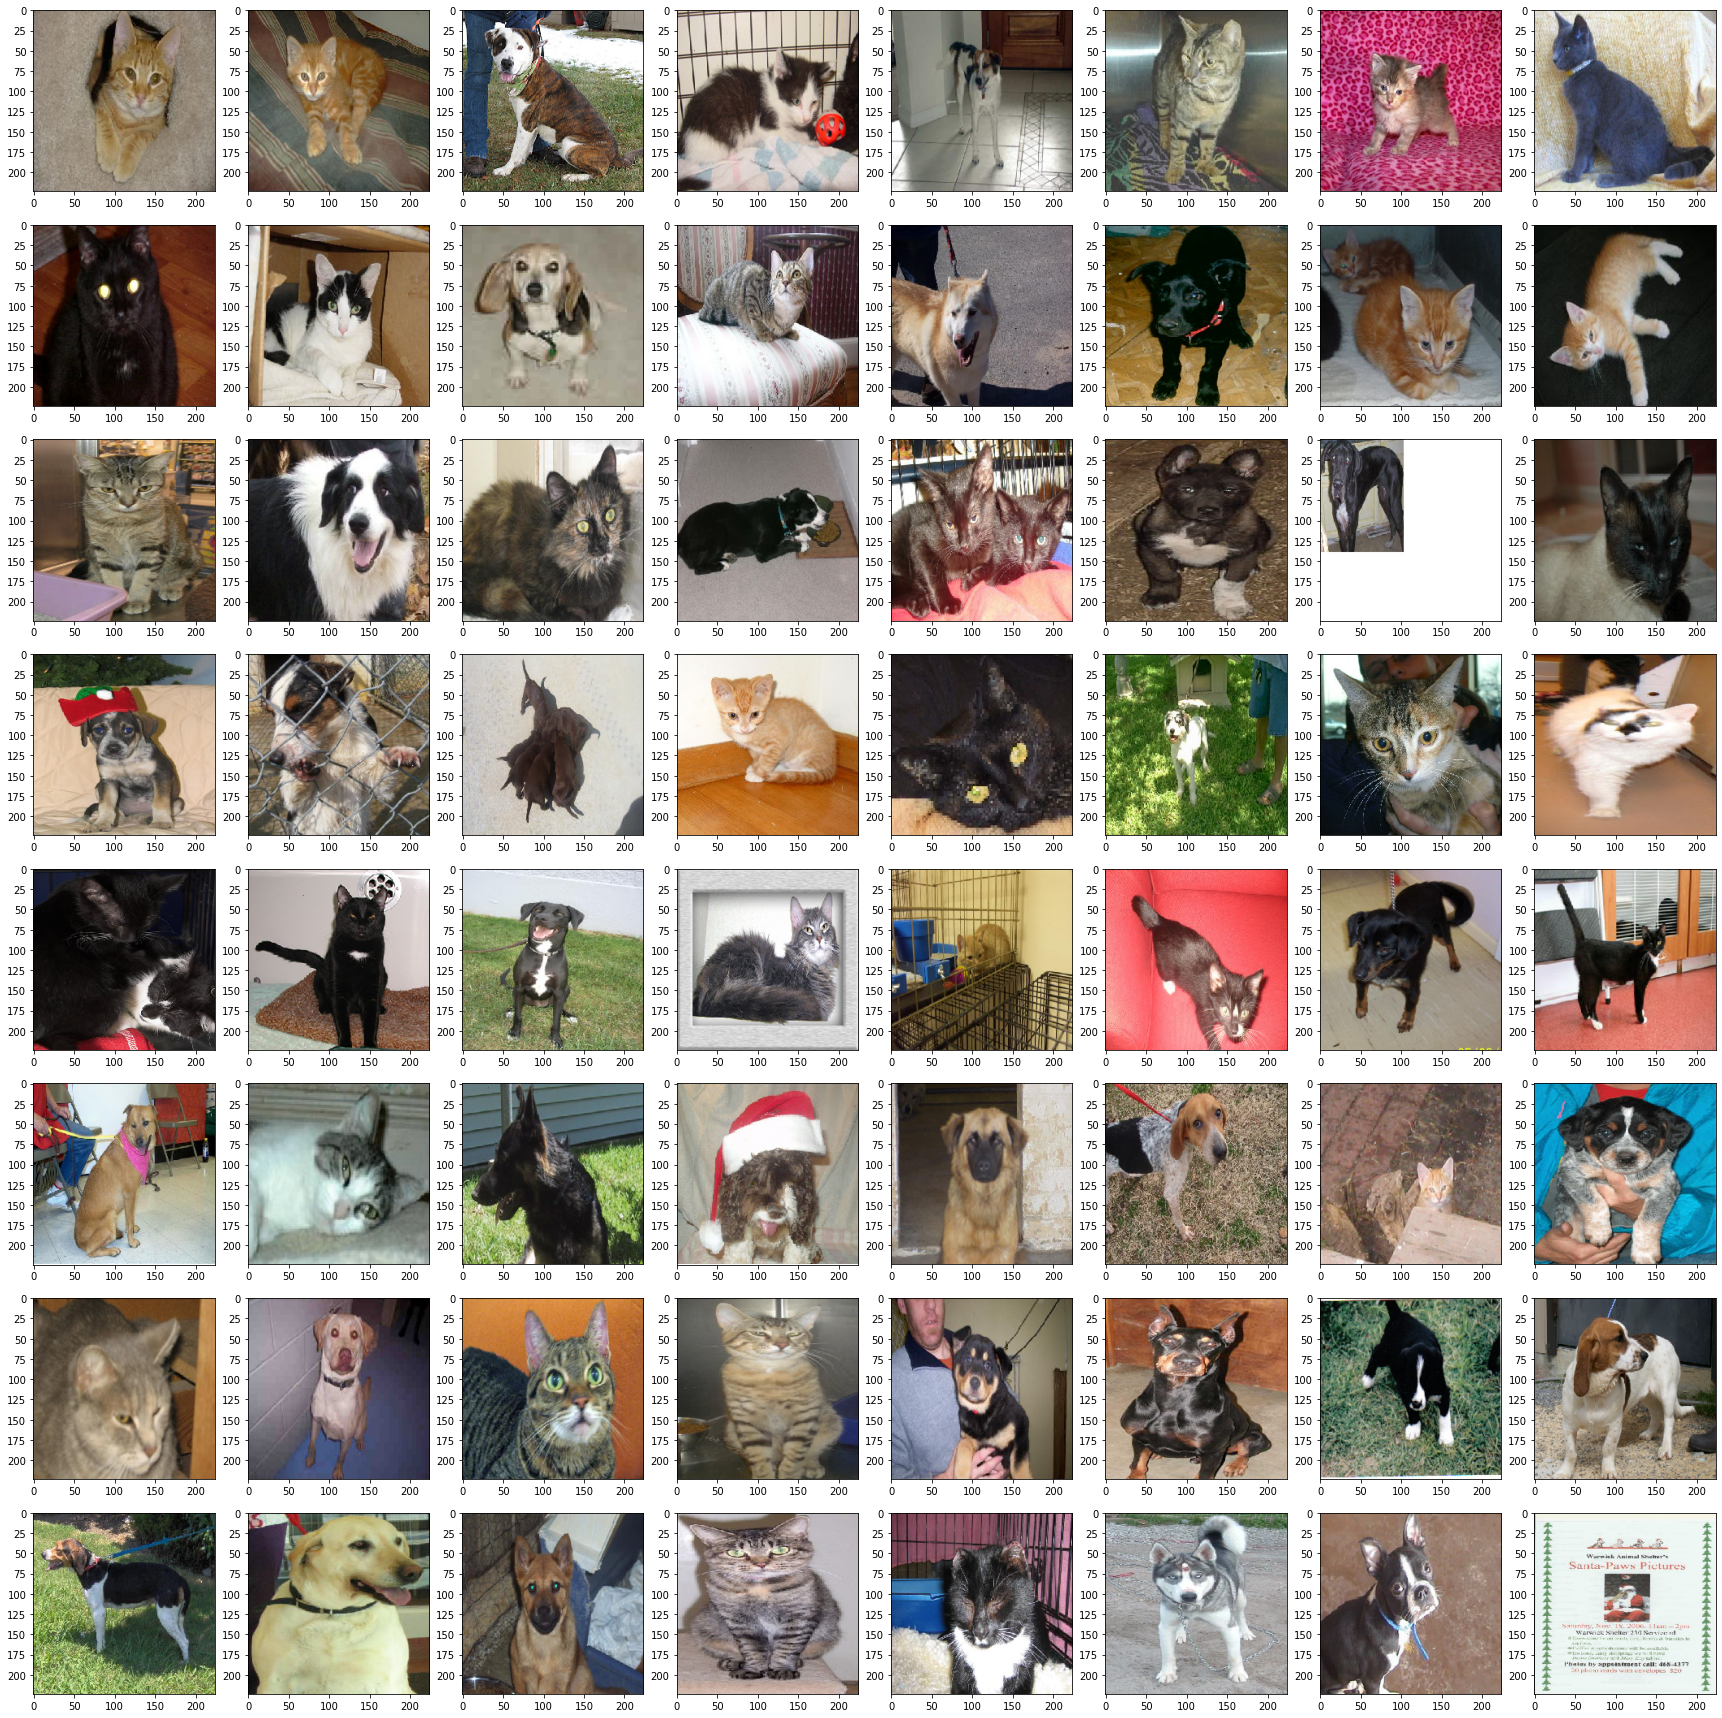

In [ ]:
def visualize_batch(batch: tf.keras.preprocessing.image.DirectoryIterator):
    n = 64
    num_row, num_col = 8, 8
    fig, axes = plt.subplots(num_row, num_col, figsize=(3 * num_col, 3 * num_row))
    
    for i in range(n):
        img = np.array(batch[0][i] * 255, dtype='uint8')
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()
    
    
visualize_batch(batch=first_batch)

In [ ]:
train_data = train_datagen.flow_from_directory(
    directory='data/train/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory='data/validation/',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    seed=42
)

Found 20038 images belonging to 2 classes.
Found 2479 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

Epoch 1/10
314/314 [==============================] - 1057s 3s/step - loss: 0.6272 - accuracy: 0.6755 - val_loss: 0.5523 - val_accuracy: 0.7176
Epoch 2/10
314/314 [==============================] - 1049s 3s/step - loss: 0.4942 - accuracy: 0.7580 - val_loss: 0.5211 - val_accuracy: 0.7463
Epoch 3/10
314/314 [==============================] - 1067s 3s/step - loss: 0.3725 - accuracy: 0.8308 - val_loss: 0.5673 - val_accuracy: 0.7543
Epoch 4/10
314/314 [==============================] - 1061s 3s/step - loss: 0.2125 - accuracy: 0.9155 - val_loss: 0.6566 - val_accuracy: 0.7616
Epoch 5/10
314/314 [==============================] - 1060s 3s/step - loss: 0.0875 - accuracy: 0.9713 - val_loss: 1.0010 - val_accuracy: 0.7438
Epoch 6/10
314/314 [==============================] - 1061s 3s/step - loss: 0.0430 - accuracy: 0.9914 - val_loss: 1.1434 - val_accuracy: 0.7600
Epoch 7/10
314/314 [==============================] - 1054s 3s/step - loss: 0.0265 - accuracy: 0.9930 - val_loss: 1.2498 - val_accuracy:

In [ ]:
def prepare_single_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = img.resize(size=(224, 224))
    return np.array(img) / 255.0

In [ ]:
single_image = prepare_single_image(img_path='data/test/cat/10050.jpg')
single_prediction = model.predict(single_image.reshape(-1, 224, 224, 3))
single_prediction

array([[0.28255856, 0.71744144]], dtype=float32)

In [ ]:
num_total_cat, num_correct_cat = 0, 0

for img_path in pathlib.Path.cwd().joinpath('data/test/cat').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model.predict(img.reshape(-1, 224, 224, 3)) #tf.expand_dims(img, axis=0)
        pred = pred.argmax()
        num_total_cat += 1
        if pred == 0:
            num_correct_cat += 1
    except Exception as e:
        continue
        


In [ ]:
num_total_cat

1242

In [ ]:
num_correct_cat

961

In [ ]:
num_correct_cat/num_total_cat

0.7737520128824477

In [ ]:
num_total_dog, num_correct_dog = 0, 0

for img_path in pathlib.Path.cwd().joinpath('data/test/dog').iterdir():
    try:
        img = prepare_single_image(img_path=str(img_path))
        pred = model.predict(img.reshape(-1, 224, 224, 3))  #tf.expand_dims(img, axis=0)
        pred = pred.argmax()
        num_total_dog += 1
        if pred == 1:
            num_correct_dog += 1
    except Exception as e:
        continue

In [ ]:
num_total_dog

1243

In [ ]:
num_correct_dog

945

In [ ]:
num_correct_dog/num_total_dog

0.7602574416733708